In [97]:
#Loading all necessery imports

In [98]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

In [99]:
from pandas import DataFrame,Series

In [100]:
from scipy import stats

In [101]:
from scipy.stats import pearsonr, spearmanr

In [102]:
from scipy.stats import ttest_ind

In [103]:
from scipy.stats import f_oneway

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [105]:
#Data Loading & Basic Information

In [106]:
file = r'C:\Users\win11\Desktop\MASTER\Data Science\Projekat/Reviews.csv'
df = pd.read_csv(file)

#Showing dataset like dataframe
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [107]:
# Displaying basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [108]:
#Displaying first few rows of dataset 

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [109]:
#Statistical describing of dataset 
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [110]:
#Showing all data per data types

data_types = df.dtypes
print("Data Types :")
data_types

Data Types :


Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [111]:
#Checking missing values 
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [112]:
# Fill missing values with empty string in 'ProfileName' and 'Summary' columns
import pandas as pd

df['ProfileName'] = df['ProfileName'].fillna('')
df['Summary'] = df['Summary'].fillna('')

In [113]:
#Checking null values after handeling 'ProfileName' and 'Summary' columns problem

df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [114]:
# Checking for duplicate rows
duplicate_rows = df.duplicated()

# Displaying the duplicate rows
print("Number of duplicate rows:", duplicate_rows.sum())
print(df[duplicate_rows])

Number of duplicate rows: 0
Empty DataFrame
Columns: [Id, ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, Summary, Text]
Index: []


In [115]:
#Data Cleaning

In [116]:
#Handeling NaN values in 'ProfileName' and 'Summary' columns

df['ProfileName'] = df['ProfileName'].fillna('')
df['Summary'] = df['Summary'].fillna('')

df_cleaned = df.copy()

In [117]:
df_cleaned

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [118]:
#Removing reviews where 'HelpfulnessDenominator' is equal to 0
if 'HelpfulnessDenominator' in df_cleaned.columns:
    zero_reviews = (df_cleaned['HelpfulnessDenominator'] == 0).sum()
    df_cleaned = df_cleaned[df_cleaned['HelpfulnessDenominator'] != 0].copy()
else:
    print("There are no reviews where 'HelpfulnessDenominator' is equal to 0 .")

In [119]:
df_cleaned = df_cleaned[
    df_cleaned['HelpfulnessNumerator'] <= df_cleaned['HelpfulnessDenominator']
]

In [120]:
df_cleaned

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
...,...,...,...,...,...,...,...,...,...,...
568440,568441,B005ZC0RRO,A2TO5R8QLIITEF,SAK,1,1,5,1323734400,"Delicious, all natural and allergy free treats!",Indie Candy's gummies are absolutely delicious...
568444,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po..."
568445,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A..."
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."


In [121]:
#Converting 'Time' column into datetime
if 'Time' in df_cleaned.columns:
    df_cleaned['Time'] = pd.to_datetime(df_cleaned['Time'], unit='s')
    print(df_cleaned['Time'].head(3))
    
    df_cleaned['Year'] = df_cleaned['Time'].dt.year
    df_cleaned['Month'] = df_cleaned['Time'].dt.month
    df_cleaned['Weekday'] = df_cleaned['Time'].dt.day_name()    
    
df_cleaned

0   2011-04-27
2   2008-08-18
3   2011-06-13
Name: Time, dtype: datetime64[ns]


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Year,Month,Weekday
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011,4,Wednesday
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,2008,8,Monday
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,2011,6,Monday
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,2011-11-23,Yay Barley,Right now I'm mostly just sprouting this so my...,2011,11,Wednesday
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,2005-02-08,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,2005,2,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568440,568441,B005ZC0RRO,A2TO5R8QLIITEF,SAK,1,1,5,2011-12-13,"Delicious, all natural and allergy free treats!",Indie Candy's gummies are absolutely delicious...,2011,12,Tuesday
568444,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,2009-06-19,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po...",2009,6,Friday
568445,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,2010-03-08,Five Spice Powder,"You can make this mix yourself, but the Star A...",2010,3,Monday
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2012,2,Tuesday


In [122]:
#Removing duplicates after performing Data Cleaning

df_clear = df_cleaned.drop_duplicates()
df_clear

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Year,Month,Weekday
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011,4,Wednesday
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,2008,8,Monday
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,2011,6,Monday
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,2011-11-23,Yay Barley,Right now I'm mostly just sprouting this so my...,2011,11,Wednesday
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,2005-02-08,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,2005,2,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568440,568441,B005ZC0RRO,A2TO5R8QLIITEF,SAK,1,1,5,2011-12-13,"Delicious, all natural and allergy free treats!",Indie Candy's gummies are absolutely delicious...,2011,12,Tuesday
568444,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,2009-06-19,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po...",2009,6,Friday
568445,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,2010-03-08,Five Spice Powder,"You can make this mix yourself, but the Star A...",2010,3,Monday
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2012,2,Tuesday


In [123]:
df_clear.info()
df_clear.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 298400 entries, 0 to 568452
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      298400 non-null  int64         
 1   ProductId               298400 non-null  object        
 2   UserId                  298400 non-null  object        
 3   ProfileName             298400 non-null  object        
 4   HelpfulnessNumerator    298400 non-null  int64         
 5   HelpfulnessDenominator  298400 non-null  int64         
 6   Score                   298400 non-null  int64         
 7   Time                    298400 non-null  datetime64[ns]
 8   Summary                 298400 non-null  object        
 9   Text                    298400 non-null  object        
 10  Year                    298400 non-null  int32         
 11  Month                   298400 non-null  int32         
 12  Weekday                 298400 non-

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Year,Month
count,298400.000000,298400.000000,298400.000000,298400.000000,298400,298400.000000,298400.000000
mean,283377.345198,3.321964,4.245888,3.979306,2010-08-28 21:11:58.938338048,2010.177312,6.299956
min,1.000000,0.000000,1.000000,1.000000,1999-10-25 00:00:00,1999.000000,1.000000
25%,142109.750000,1.000000,1.000000,3.000000,2009-09-14 00:00:00,2009.000000,3.000000
50%,283620.500000,1.000000,2.000000,5.000000,2011-01-31 00:00:00,2011.000000,6.000000
75%,424475.750000,3.000000,4.000000,5.000000,2011-12-09 00:00:00,2011.000000,9.000000
max,568453.000000,866.000000,923.000000,5.000000,2012-10-26 00:00:00,2012.000000,12.000000
std,163279.929734,10.288371,11.061083,1.461237,NaN,1.633455,3.500151


In [124]:
#Feature Engineering

In [125]:
#Creating new column 'HelpfulnessRatio' that will represent
#ratio of helpfulness between 'HelpfulnessNumerator' and HelpfulnessDenominator

df_clear['HelpfulnessRatio'] = df_clear['HelpfulnessNumerator'] / (df_clear['HelpfulnessDenominator'] + 1e-10)
df_clear['HelpfulnessRatio']

0         1.0
2         1.0
3         1.0
8         1.0
10        1.0
         ... 
568440    1.0
568444    1.0
568445    1.0
568451    1.0
568452    1.0
Name: HelpfulnessRatio, Length: 298400, dtype: float64

In [126]:
#Creating a new column that will represent number of charachters
df_clear['review_length'] = df_clear['Text'].astype(str).str.len()
df_clear['review_length']

0         263
2         509
3         219
8         131
10        779
         ... 
568440    807
568444    162
568445    304
568451    372
568452    200
Name: review_length, Length: 298400, dtype: int64

In [127]:
#Creating a new column that will represent number of words 
df_clear['word_count'] = df_clear['Text'].astype(str).apply(lambda x: len(x.split()))
df_clear['word_count']

0          48
2          94
3          41
8          26
10        146
         ... 
568440    150
568444     34
568445     54
568451     66
568452     35
Name: word_count, Length: 298400, dtype: int64

In [128]:
#Creating a new column that will represent length of words in Summary column 

df_clear['summary_length'] = df_clear['Summary'].astype(str).str.len()
df_clear['summary_length']

0         21
2         21
3         14
8         10
10        31
          ..
568440    47
568444    30
568445    17
568451    24
568452    34
Name: summary_length, Length: 298400, dtype: int64

In [129]:
temporal_cols = ['Year', 'Month', 'Weekdays']
existing_temporal = [col for col in temporal_cols if col in df_clear.columns]

if existing_temporal:
    print(f" Already in dataset: {existing_temporal}")
        
    if 'Year' in df_clear.columns:
        print(f"Years: {sorted(df_clear['Year'].unique())[:5]}...")
        
    if 'Month' in df_clear.columns:
        month_names = {
            1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
            7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
        }
        months = sorted(df_clear['Month'].unique())
        month_names_str = [month_names.get(m, m) for m in months[:6]]
        print(f"Months: {month_names_str}")
    
    if 'Weekday' in df_clear.columns:
        weekdays = df_clear['Weekday'].value_counts()
        print(f"Days in week : {weekdays.index.tolist()}")
    
    else:
        if 'Time' in df_clear.columns and pd.api.types.is_datetime64_any_dtype(df_cleaned['Time']):
            df_clear['Year'] = df_clear['Time'].dt.year
            df_clear['Month'] = df_clear['Time'].dt.month
            df_clear['Weekday'] = df_clear['Time'].dt.day_name()

 Already in dataset: ['Year', 'Month']
Years: [1999, 2000, 2001, 2002, 2003]...
Months: ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
Days in week : ['Wednesday', 'Thursday', 'Tuesday', 'Monday', 'Friday', 'Saturday', 'Sunday']


In [130]:
#Creating Star rating based on Score certain review get
#Three type of rating : is_positive (Score ≥ 4) ,is_negative (Score ≤ 2),is_neutral (Score == 3)

if 'Score' in df_clear.columns:
        df_clear['is_positive'] = (df_clear['Score'] >= 4).astype(int)
        
        df_clear['is_negative'] = (df_clear['Score'] <= 2).astype(int)
        
        df_clear['is_neutral'] = (df_clear['Score'] == 3).astype(int)
                
        positive_count = df_clear['is_positive'].sum()
        negative_count = df_clear['is_negative'].sum()
        neutral_count = df_clear['is_neutral'].sum()
        
        positive_pct = positive_count / len(df_clear) * 100
        negative_pct = negative_count / len(df_clear) * 100
        neutral_pct = neutral_count / len(df_clear) * 100
        
        print(f"Positive (Score ≥ 4): {positive_count} ({positive_pct:.1f}%)")
        print(f"Negative (Score ≤ 2): {negative_count} ({negative_pct:.1f}%)")
        print(f"Neutral  (Score = 3): {neutral_count} ({neutral_pct:.1f}%)")
        

Positive (Score ≥ 4): 215016 (72.1%)
Negative (Score ≤ 2): 59167 (19.8%)
Neutral  (Score = 3): 24217 (8.1%)


In [131]:
score_counts = df_clear['Score'].value_counts().sort_index()
for score, count in score_counts.items():
    percentage = count / len(df_clear) * 100
    print(f"{score} stars : {count} ({percentage:.1f}%)")

1 stars : 40002 (13.4%)
2 stars : 19165 (6.4%)
3 stars : 24217 (8.1%)
4 stars : 38638 (12.9%)
5 stars : 176378 (59.1%)


In [132]:
#Exploratory Data Analysis (EDA)

In [133]:
#'Score' - 'helpfulness_ratio' distribution
score = df_clear['Score']
helpfulness_ratio = df_clear['HelpfulnessRatio']

C:\Users\win11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


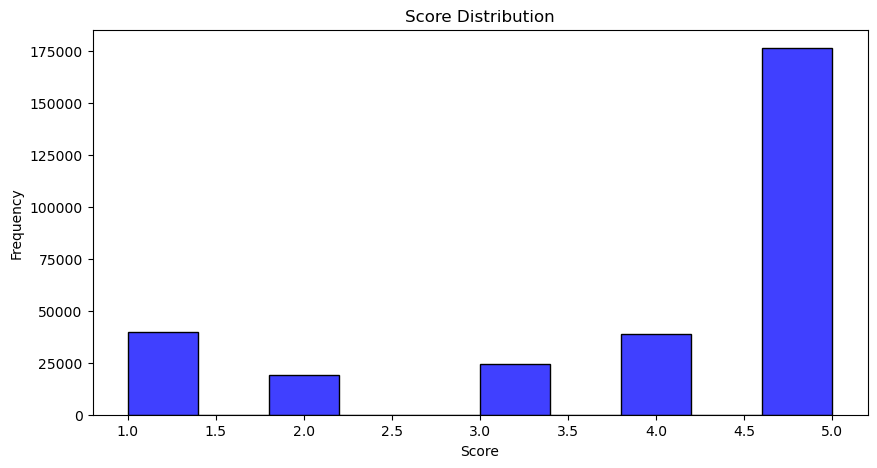

In [134]:
#'Score' Frequency graph

plt.figure(figsize=(10, 5))
sns.histplot(score, bins=10, kde=False, color='blue')
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

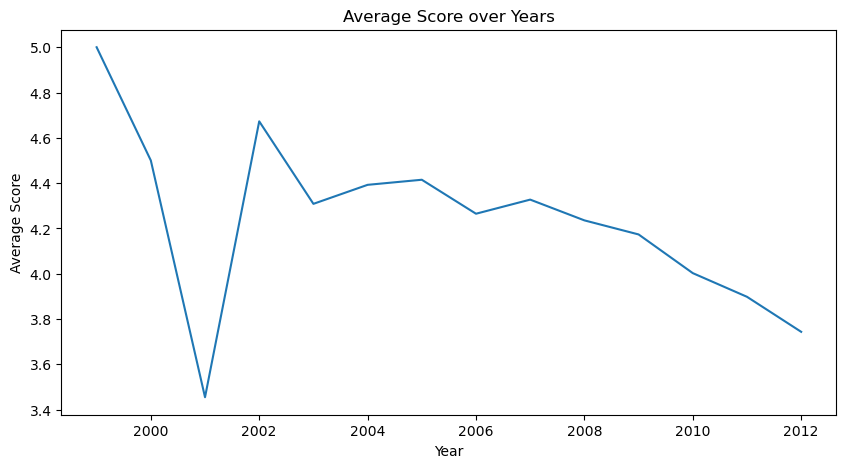

In [135]:
#Visualization : Average Score per Year
df_clear.groupby('Year')['Score'].mean().plot(figsize=(10,5))
plt.title('Average Score over Years')
plt.ylabel('Average Score')
plt.show()

C:\Users\win11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


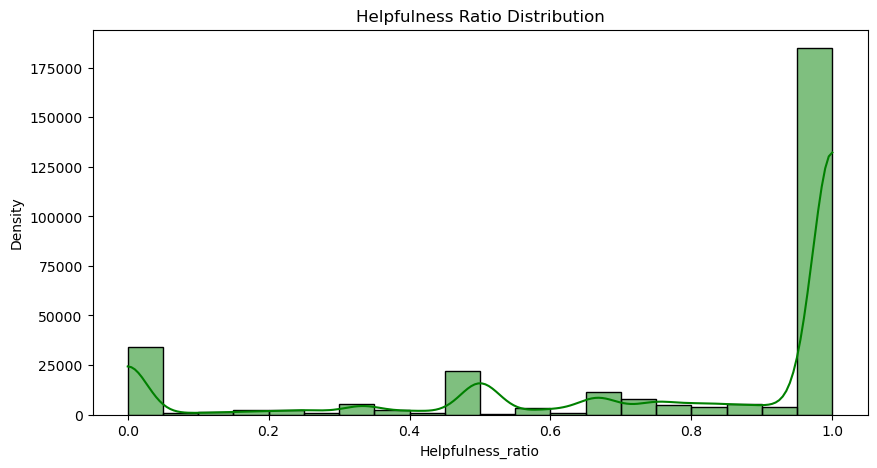

In [136]:
# Histogram for helpfulness_ratio
plt.figure(figsize=(10, 5))
sns.histplot(helpfulness_ratio, bins=20, kde=True, color='green')
plt.title('Helpfulness Ratio Distribution')
plt.xlabel('Helpfulness_ratio')
plt.ylabel('Density')
plt.show()

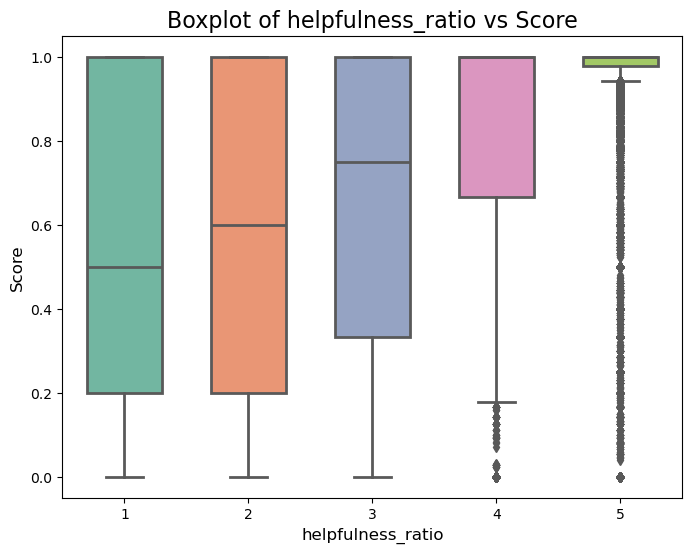

In [137]:
#Boxplot: helpfulness_ratio vs Score
score = df_clear['Score']
helpfulness_ratio = df_clear['HelpfulnessRatio']

x = score
y = helpfulness_ratio

fig = plt.figure(figsize=(8,6))
sns.boxplot(x = score,
y = helpfulness_ratio,palette="Set2",
width=0.6,
linewidth=2)

plt.title("Boxplot of helpfulness_ratio vs Score",fontsize=16)
plt.xlabel("helpfulness_ratio",fontsize=12)
plt.ylabel("Score",fontsize=12)

plt.show()

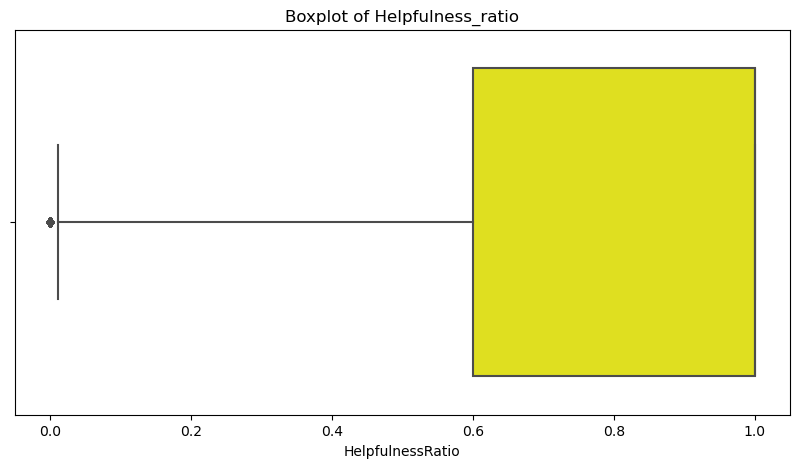

In [193]:
# Boxplot helpfulness_ratio
helpfulness_ratio = df_clear['HelpfulnessRatio']

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_clear['HelpfulnessRatio'], color='yellow')
plt.title('Boxplot of Helpfulness_ratio')
plt.show()

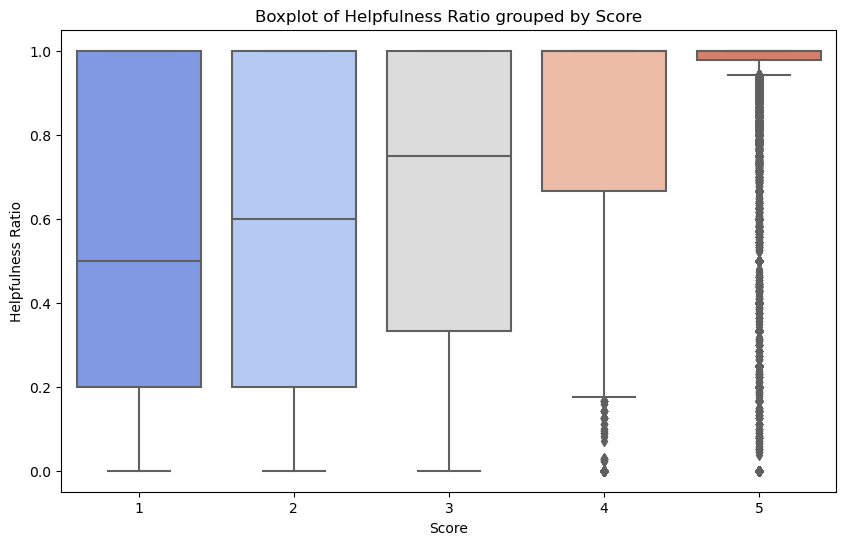

In [194]:
# Boxplot helpfulness_ratio vs. Score
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clear['Score'], y=df_clear['HelpfulnessRatio'], data=df_clear, palette='coolwarm')
plt.title('Boxplot of Helpfulness Ratio grouped by Score')
plt.xlabel('Score')
plt.ylabel('Helpfulness Ratio')
plt.show()

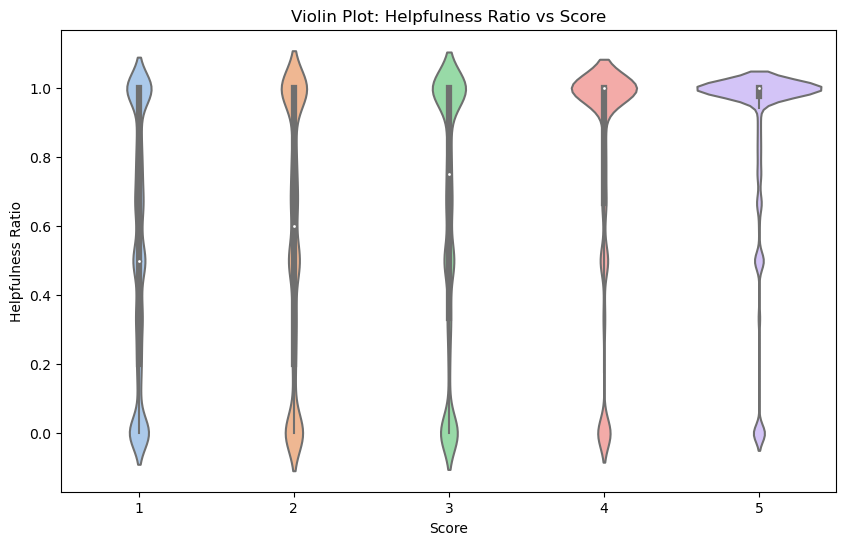

In [140]:
#Visualization : Violin Plot: Helpfulness Ratio vs Score
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_clear['Score'], y=helpfulness_ratio, data=df_clear, palette='pastel')
plt.title('Violin Plot: Helpfulness Ratio vs Score')
plt.xlabel('Score')
plt.ylabel('Helpfulness Ratio')
plt.show()

In [141]:
#Corelations of helpfulness_ratio vs word_count

helpfulness_ratio = df_clear['HelpfulnessRatio']
word_count = df_clear['word_count']

correlation1 = helpfulness_ratio.corr(word_count)
print(f"The correlation between helpfulness_ratio and word_count is : {correlation1}")
print(f"The correlation in percentage is {correlation1:.2%}")

The correlation between helpfulness_ratio and word_count is : 0.04086674660071652
The correlation in percentage is 4.09%


In [142]:
#Corelations of helpfulness_ratio vs review_length

helpfulness_ratio = df_clear['HelpfulnessRatio']
review_length = df_clear['review_length']

correlation2 = helpfulness_ratio.corr(review_length)
print(f"The correlation between helpfulness_ratio and review_length is : {correlation2}")
print(f"The correlation in percentage is {correlation2:.2%}")

The correlation between helpfulness_ratio and review_length is : 0.039124168568013325
The correlation in percentage is 3.91%


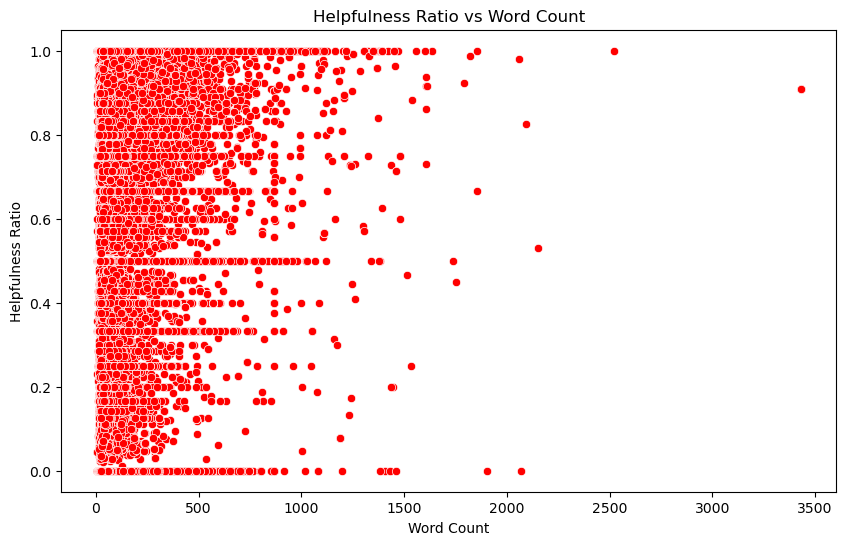

In [195]:
# Visualization : Scatter plot of correlations of helpfulness_ratio vs word_count
plt.figure(figsize=(10, 6))
sns.scatterplot(x=word_count, y=helpfulness_ratio, data=df_clear, color='red')
plt.title('Helpfulness Ratio vs Word Count')
plt.xlabel('Word Count')
plt.ylabel('Helpfulness Ratio')
plt.show()

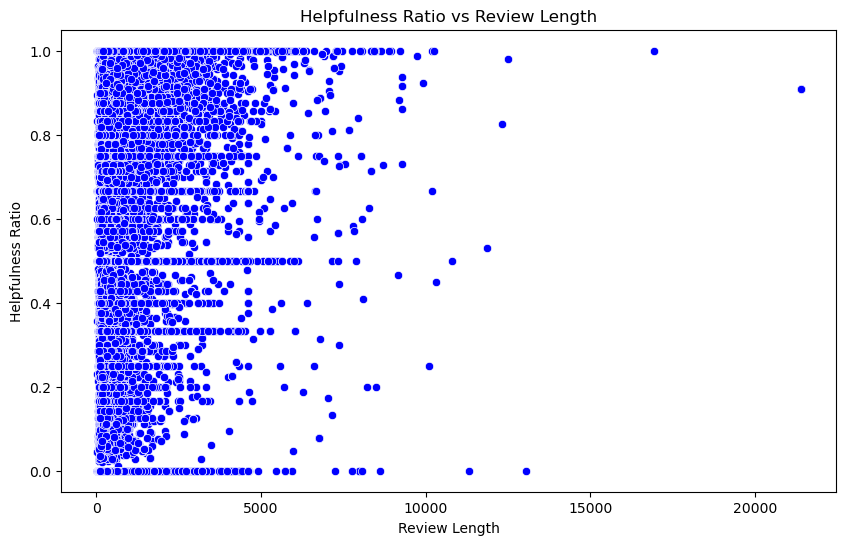

In [144]:
# Visualization : Scatter plot helpfulness_ratio vs review_length
plt.figure(figsize=(10, 6))
sns.scatterplot(x=review_length, y=helpfulness_ratio, data=df_clear, color='blue')
plt.title('Helpfulness Ratio vs Review Length')
plt.xlabel('Review Length')
plt.ylabel('Helpfulness Ratio')
plt.show()

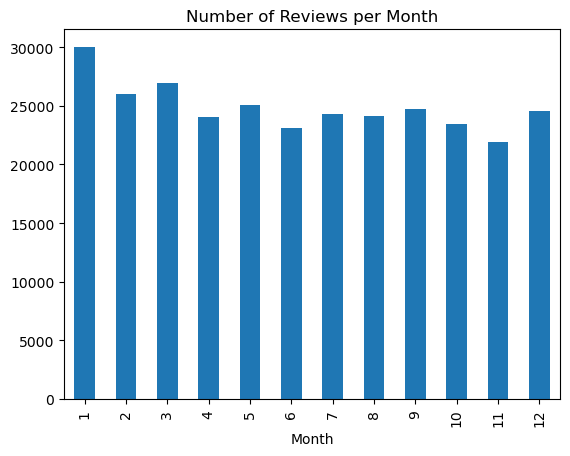

In [145]:
#Number of reviews per month for all years in dataset

df_clear['Month'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Reviews per Month')
plt.show()

In [146]:
#DESCRIPTIVE STATISTICS

In [147]:
#Mean , median and std for helpfulness_ratio

helpfulness_ratio = df_clear['HelpfulnessRatio']

mean = helpfulness_ratio.mean()
median = helpfulness_ratio.median()
std = helpfulness_ratio.std()

print(f"The mean value of helpfulness_ratio is {mean:.2f}.")
print(f"The median value of helpfulness_ratio is {median:.2f}.")
print(f"The standard deviation value of helpfulness_ratio is {std:.2f}.")

The mean value of helpfulness_ratio is 0.78.
The median value of helpfulness_ratio is 1.00.
The standard deviation value of helpfulness_ratio is 0.35.


In [148]:
#Mean , median and std for word_count

word_count = df_clear['word_count']

mean = word_count.mean()
median = word_count.median()
std = word_count.std()

print(f"The mean value of word_count is {mean:.2f}.")
print(f"The median value of word_count is {median:.2f}.")
print(f"The standard deviation value of word_count is {std:.2f}.")

The mean value of word_count is 89.66.
The median value of word_count is 63.00.
The standard deviation value of word_count is 91.34.


In [149]:
# Mean, Median, Std for both columns(word_count and helpfulness_ratio)
desc_stats = df_clear[['word_count', 'HelpfulnessRatio']].agg(['mean', 'median', 'std'])

print("Descriptive statistics:\n", desc_stats)

Descriptive statistics:
         word_count  HelpfulnessRatio
mean     89.660094          0.776965
median   63.000000          1.000000
std      91.337541          0.346296


In [150]:
# Grouped statistic of helpfulness_ratio per Score 
grouped_stats = df_clear.groupby('Score')['HelpfulnessRatio'].agg(['mean', 'median', 'std', 'count'])

print("Grouped descriptive statistics:\n", grouped_stats)

Grouped descriptive statistics:
            mean  median       std   count
Score                                    
1      0.539190    0.50  0.374234   40002
2      0.566424    0.60  0.389971   19165
3      0.625534    0.75  0.394620   24217
4      0.790809    1.00  0.346362   38638
5      0.871527    1.00  0.277790  176378


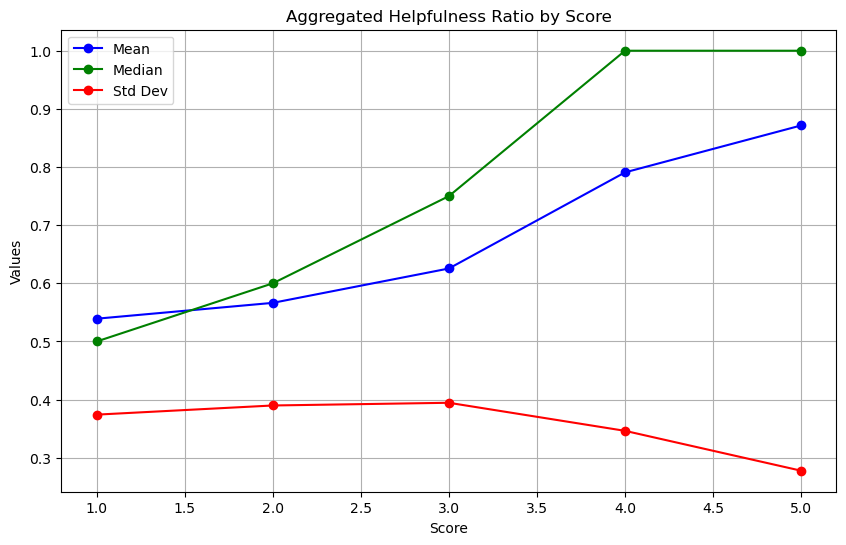

In [151]:
# Visualization of Grouped statistic of helpfulness_ratio per Score 

grouped_stats = df_clear.groupby('Score')['HelpfulnessRatio'].agg(['mean', 'median', 'std', 'count'])
grouped_stats_reset = grouped_stats.reset_index() 

plt.figure(figsize=(10, 6))

plt.plot(grouped_stats_reset['Score'], grouped_stats_reset['mean'], label='Mean', marker='o', color='blue')
plt.plot(grouped_stats_reset['Score'], grouped_stats_reset['median'], label='Median', marker='o', color='green')
plt.plot(grouped_stats_reset['Score'], grouped_stats_reset['std'], label='Std Dev', marker='o', color='red')

plt.title('Aggregated Helpfulness Ratio by Score')
plt.xlabel('Score')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

In [152]:
# Percentiles for helpfulness_ratio i word_count
percentiles_helpfulness = helpfulness_ratio.quantile([0.25, 0.5, 0.75])
percentiles_word_count = word_count.quantile([0.25, 0.5, 0.75])

print("Helpfulness Ratio percentiles:\n", percentiles_helpfulness)
print("Word Count percentiles:\n", percentiles_word_count)

Helpfulness Ratio percentiles:
 0.25    0.6
0.50    1.0
0.75    1.0
Name: HelpfulnessRatio, dtype: float64
Word Count percentiles:
 0.25     36.0
0.50     63.0
0.75    109.0
Name: word_count, dtype: float64


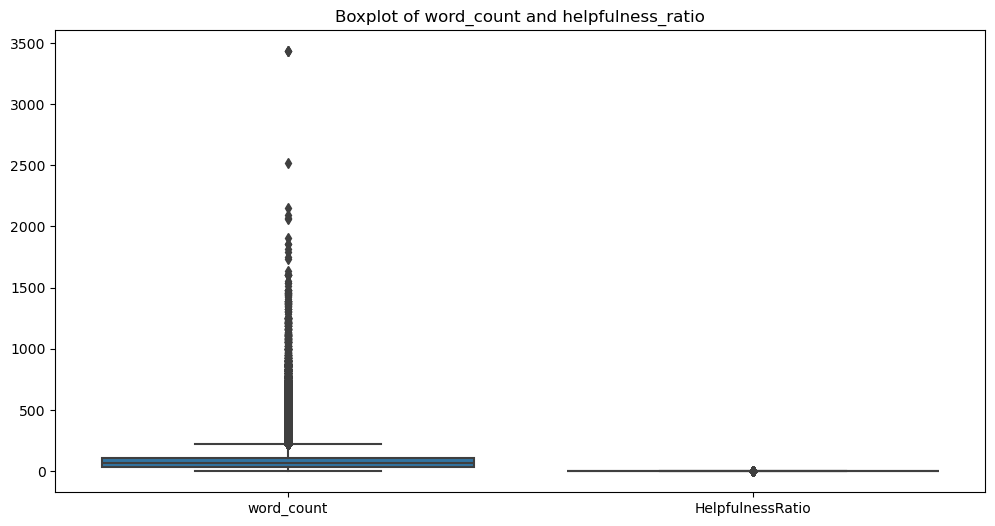

In [153]:
#Visualization : Boxplot of word_count and helpfulness_ratio 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clear[['word_count', 'HelpfulnessRatio']])
plt.title("Boxplot of word_count and helpfulness_ratio")
plt.show()

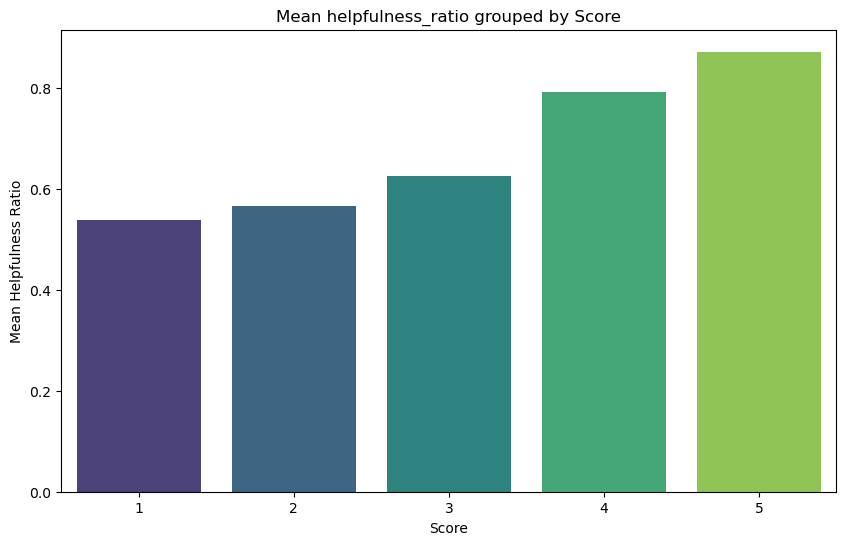

In [154]:
#Visualization : Boxplot of Grouped statistic of helpfulness_ratio per Score
grouped_mean = df_clear.groupby("Score")["HelpfulnessRatio"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='HelpfulnessRatio', data=grouped_mean, palette='viridis')
plt.title("Mean helpfulness_ratio grouped by Score")
plt.xlabel("Score")
plt.ylabel("Mean Helpfulness Ratio")
plt.show()

In [155]:
#STATISTICAL INFERENCE  & HYPOTHESIS TESTING

In [156]:
# H0: Mean helpfulness_ratio is the same for low and high scores
# H1: Mean helpfulness_ratio differs between low and high scores
#α = 0.05

In [157]:
#Pearson correlation (and p-value) between word_count and helpfulness_ratio

word_count = df_clear['word_count']
helpfulness_ratio = df_clear['HelpfulnessRatio']

pearson_corr, pearson_p = pearsonr(word_count, helpfulness_ratio)
print(f"Pearson correlation: {pearson_corr:.2f}")
print(f"Pearson p-value result is : {pearson_p:.4f}")

Pearson correlation: 0.04
Pearson p-value result is : 0.0000


In [158]:
#Since p-value < α  , by Hypothesis testing we can reject H0 hypothesis and accept H1.
#Despite p-value is significant due to large sample size calculated correlation is low.

In [159]:
#T-test and p-value (positive vs negative helpfulness_ratio)

score = df_clear['Score']
helpfulness_ratio = df_clear['HelpfulnessRatio']

positive_reviews = df_clear[df_clear['Score'] >= 4]['HelpfulnessRatio']
negative_reviews = df_clear[df_clear['Score'] <= 2]['HelpfulnessRatio']

t_result = ttest_ind(positive_reviews,negative_reviews,equal_var=False)
print(f"T-test result statistic: {t_result.statistic:.2f}")
print(f"T-test p-value result : {t_result.pvalue:.2f}")

T-test result statistic: 183.54
T-test p-value result : 0.00


In [160]:
effect_size = positive_reviews.mean() - negative_reviews.mean()
print(f"Mean difference (effect size) is : {effect_size:.3f}")

Mean difference (effect size) is : 0.309


In [161]:
#Since p-value < α  , there is significant statistical difference between two groups of reviews 
#and  by Hypothesis testing we can reject H0 hypothesis and accept H1.

In [162]:
#Null hypothesis (H₀): All groups have the same averages
#Alternative hypothesis (H₁): At least one group has a different average


In [163]:
#ANOVA test for Score groups

group1 = df_clear[df_clear['Score'] == 1]['HelpfulnessRatio']
group2 = df_clear[df_clear['Score'] == 2]['HelpfulnessRatio']
group3 = df_clear[df_clear['Score'] == 3]['HelpfulnessRatio']
group4 = df_clear[df_clear['Score'] == 4]['HelpfulnessRatio']
group5 = df_clear[df_clear['Score'] == 5]['HelpfulnessRatio']

anova_result = f_oneway(group1, group2, group3, group4, group5)
print(f"ANOVA statistical result: {anova_result.statistic:.2f}")
print(f"p-value result: {anova_result.pvalue:.2f}")

ANOVA statistical result: 12829.31
p-value result: 0.00


In [164]:
#Since  p-value < α, Alternative hypothesis (H₁) is accepted.

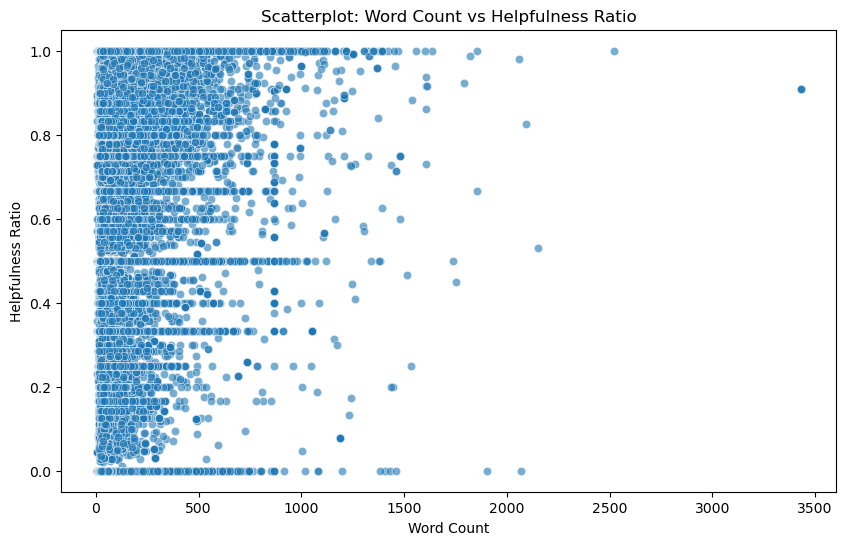

In [165]:
#Visuaization : Scatterplot of Word Count vs Helpfulness Ratio

word_count = df_clear['word_count']
helpfulness_ratio = df_clear['HelpfulnessRatio']

plt.figure(figsize=(10, 6))
sns.scatterplot(x=word_count, y=helpfulness_ratio, data=df_clear, alpha=0.6)
plt.title('Scatterplot: Word Count vs Helpfulness Ratio')
plt.xlabel('Word Count')
plt.ylabel('Helpfulness Ratio')
plt.show()

C:\Users\win11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


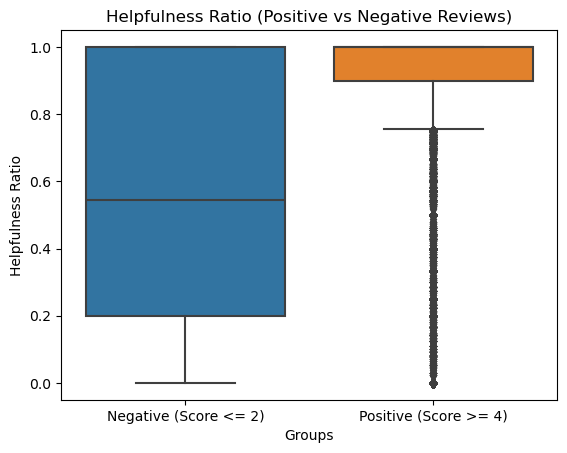

In [166]:
#Visualization : Boxplot for T-test groups

sns.boxplot(x=['Negative (Score <= 2)'] * len(negative_reviews) + ['Positive (Score >= 4)'] * len(positive_reviews), 
            y=pd.concat([negative_reviews, positive_reviews]))
plt.title("Helpfulness Ratio (Positive vs Negative Reviews)")
plt.ylabel("Helpfulness Ratio")
plt.xlabel("Groups")
plt.show()

C:\Users\win11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\win11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\win11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\win11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

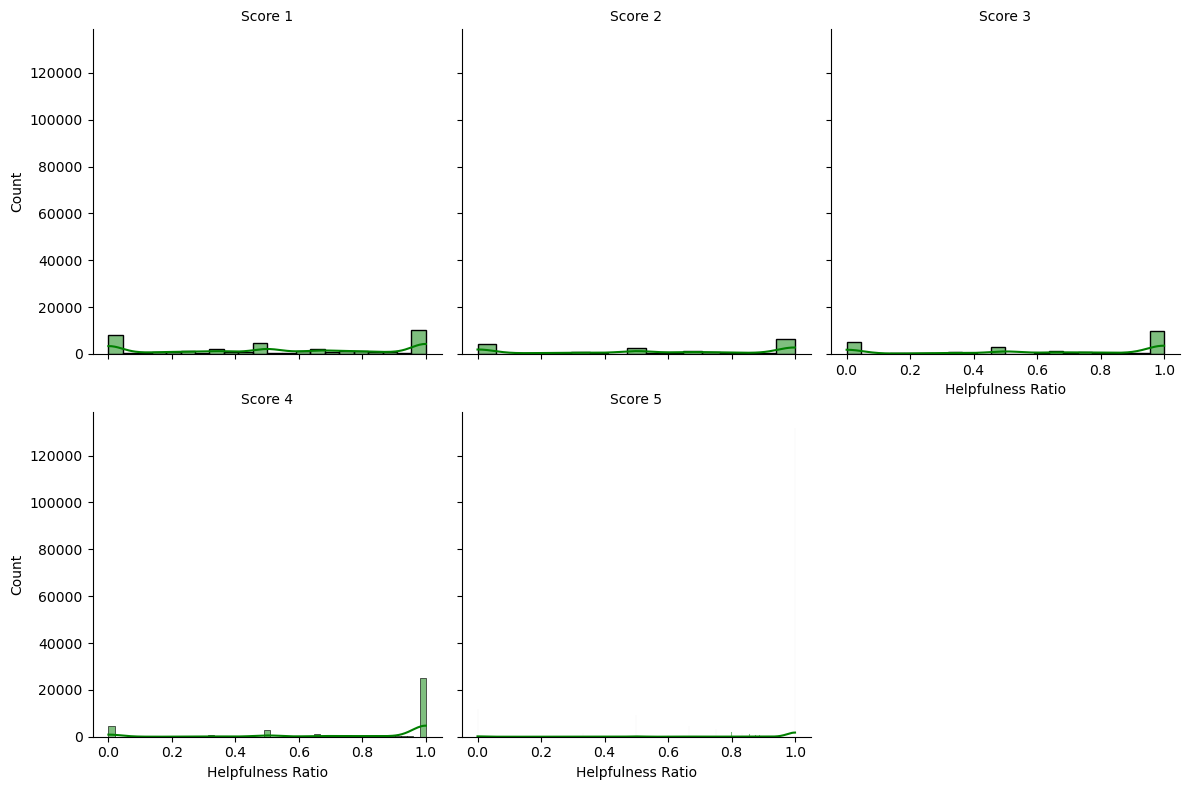

In [167]:
#Visualization : ANOVA test for Score groups

g = sns.FacetGrid(df_clear, col="Score", col_wrap=3, height=4, palette="viridis")
g.map(sns.histplot, "HelpfulnessRatio", kde=True, color="green")
g.set_titles("Score {col_name}")
g.set_axis_labels("Helpfulness Ratio", "Count")
plt.show()

In [168]:
#TIME BASED ANALYSIS 

In [169]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298400 entries, 0 to 568452
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      298400 non-null  int64         
 1   ProductId               298400 non-null  object        
 2   UserId                  298400 non-null  object        
 3   ProfileName             298400 non-null  object        
 4   HelpfulnessNumerator    298400 non-null  int64         
 5   HelpfulnessDenominator  298400 non-null  int64         
 6   Score                   298400 non-null  int64         
 7   Time                    298400 non-null  datetime64[ns]
 8   Summary                 298400 non-null  object        
 9   Text                    298400 non-null  object        
 10  Year                    298400 non-null  int32         
 11  Month                   298400 non-null  int32         
 12  Weekday                 298400 non-

In [170]:
#Average helpfulness_ratio per year
yearly_helpfulness = df_clear.groupby('Year')['HelpfulnessRatio'].mean().reset_index()

yearly_helpfulness

,Year,HelpfulnessRatio
0,1999,0.625000
1,2000,0.692728
2,2001,0.709362
3,2002,0.769941
4,2003,0.823001
5,2004,0.782924
6,2005,0.814837
7,2006,0.810476
8,2007,0.819697
9,2008,0.802079


C:\Users\win11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\win11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


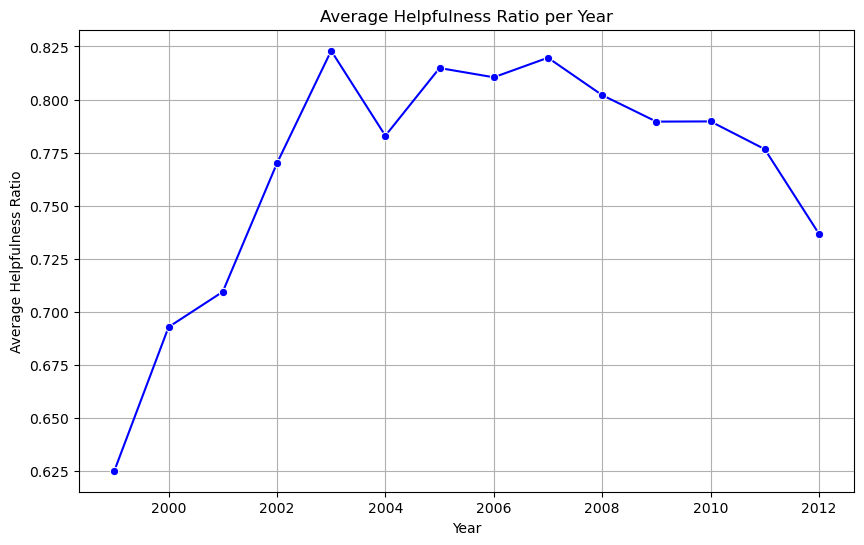

In [171]:
#Visualization of Average Helpfulness Ratio per Year

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='HelpfulnessRatio', data=yearly_helpfulness, marker='o', color='blue')
plt.title('Average Helpfulness Ratio per Year')
plt.xlabel('Year')
plt.ylabel('Average Helpfulness Ratio')
plt.grid()
plt.show()

In [172]:
#Number of reviews per Time

reviews_per_year = df_clear.groupby('Year').size().reset_index(name='review_count')

reviews_per_year

,Year,review_count
0,1999,4
1,2000,30
2,2001,11
3,2002,55
4,2003,107
5,2004,497
6,2005,1174
7,2006,5771
8,2007,17682
9,2008,23883


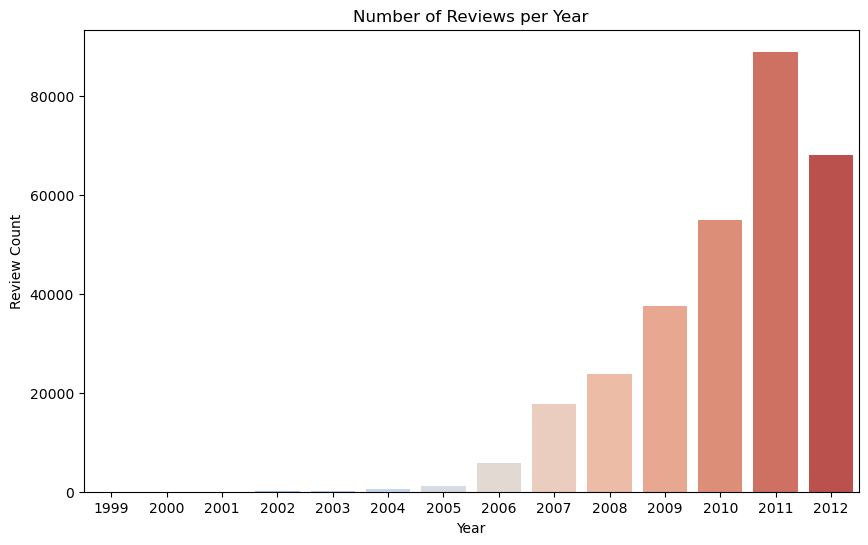

In [173]:
#Visualization of Number of reviews per Time

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='review_count', data=reviews_per_year, palette='coolwarm')
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Review Count')
plt.show()

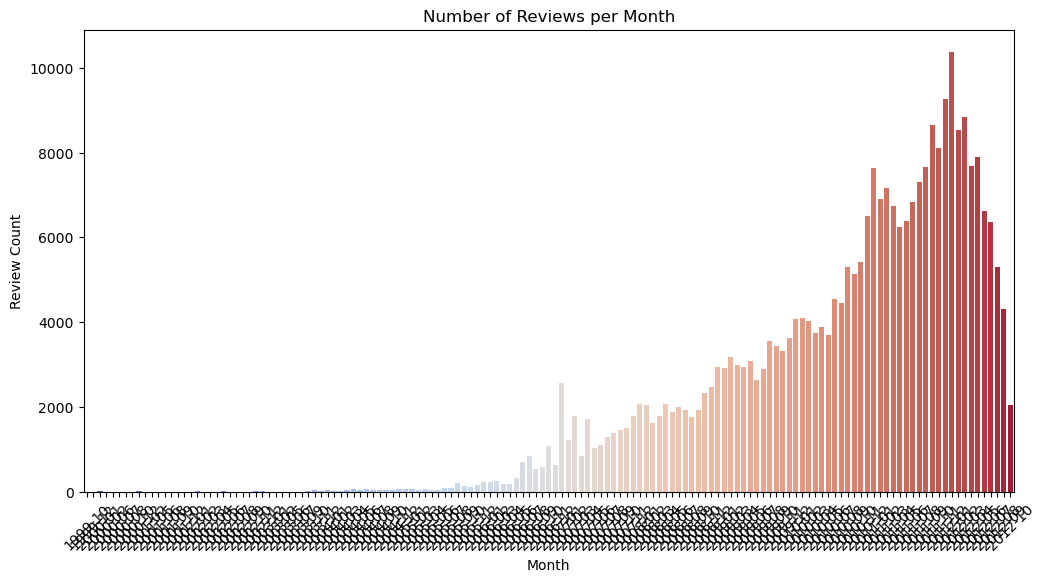

In [174]:
#Visualization : Number of Reviews per Month

df_clear['YearMonth'] = df_clear['Year'].astype(str) + '-' + df_clear['Month'].astype(str).str.zfill(2)

monthly_reviews = df_clear.groupby('YearMonth').size().reset_index(name='review_count')

plt.figure(figsize=(12, 6))
sns.barplot(x='YearMonth', y='review_count', data=monthly_reviews, palette='coolwarm')
plt.title('Number of Reviews per Month')
plt.xlabel('Month')
plt.ylabel('Review Count')
plt.xticks(rotation=45)
plt.show()

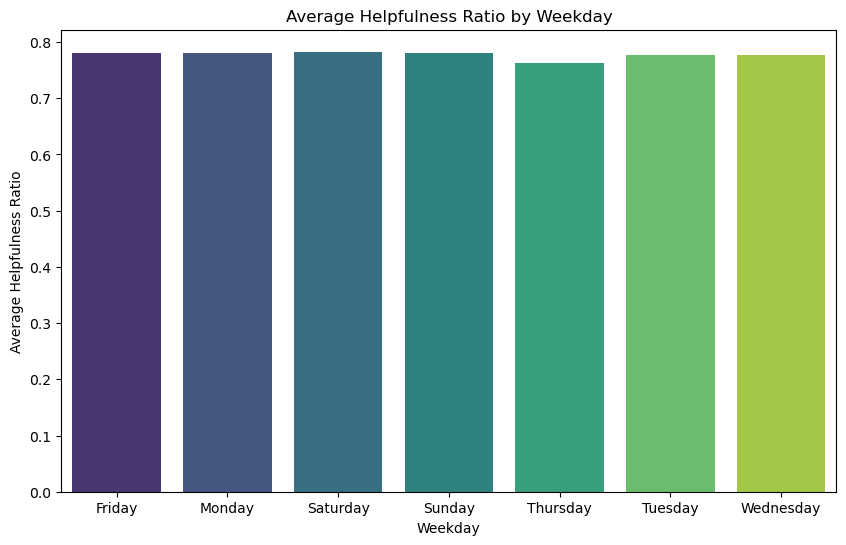

In [175]:
# Visualization : Average helpfulness_ratio per days in week 

weekday_helpfulness = df_clear.groupby('Weekday')['HelpfulnessRatio'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Weekday', y='HelpfulnessRatio', data=weekday_helpfulness, palette='viridis')
plt.title('Average Helpfulness Ratio by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Helpfulness Ratio')
plt.show()

In [176]:
#PREDICTIVE MODEL OF HELPFULNESS RATIO 

In [177]:
#Preparing features 
X = df_clear[['word_count', 'Score', 'Year']]  # Input variables
y = df_clear['HelpfulnessRatio']  #Target Variable

In [178]:
#Splitting dataset :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
#Linear Regression 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [180]:
#Predictions on test set
y_pred = model.predict(X_test)

In [181]:
#Evaluation of performed model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.10291653379281634
R-squared (R²): 0.14850139134014984


In [182]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

      Feature  Coefficient
0  word_count     0.000212
1       Score     0.088986
2        Year    -0.004117


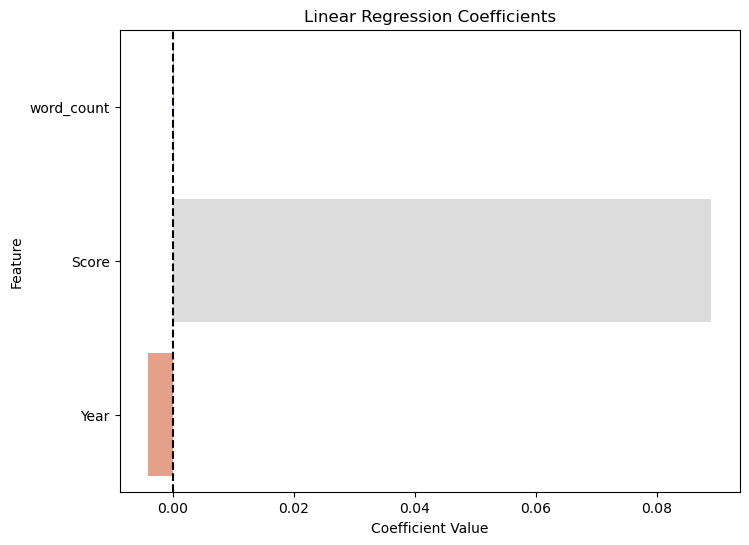

In [183]:
#Visualization : Linear coefficients graph
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='coolwarm')
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='black', linestyle='--')  
plt.show()

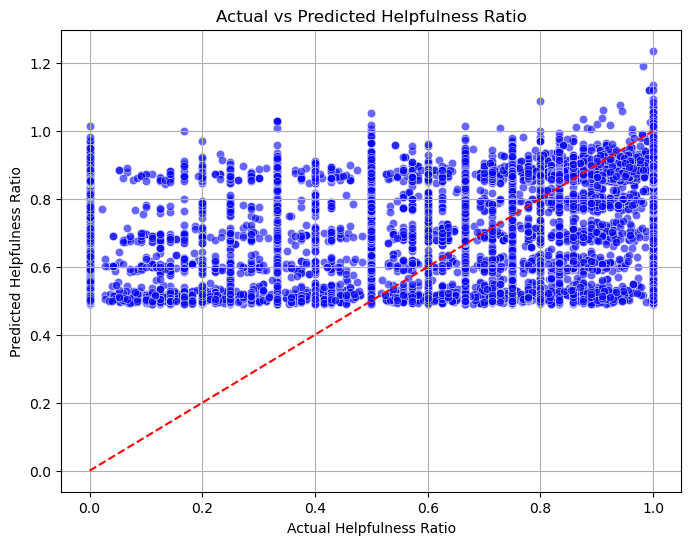

In [184]:
#Visualization : Real VS Predicted values

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  
plt.title('Actual vs Predicted Helpfulness Ratio')
plt.xlabel('Actual Helpfulness Ratio')
plt.ylabel('Predicted Helpfulness Ratio')
plt.grid()
plt.show()

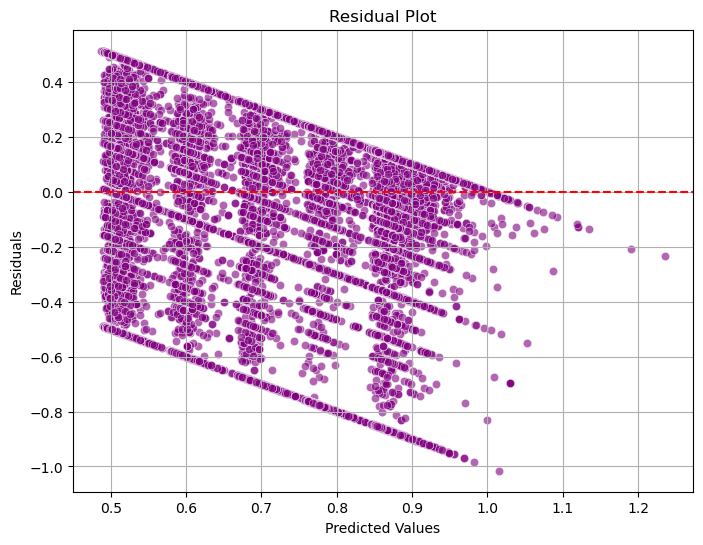

In [185]:
# Calculation of residuals 
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--')  
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

               Metric     Value
0  Mean Squared Error  0.102917
1           R-squared  0.148501


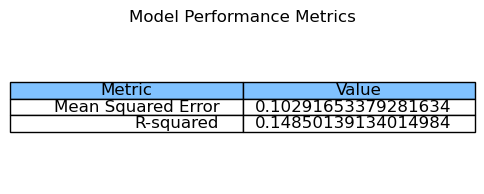

In [186]:
#Visualization : Evaluation of performances (table-like)

# Rezults
evaluation = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R-squared'],
    'Value': [mse, r2]
})

print(evaluation)

fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')
table = plt.table(cellText=evaluation.values, colLabels=evaluation.columns, colColours=["#80C2FF"]*2, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
plt.title("Model Performance Metrics")
plt.show()

      Feature  Coefficient       MSE R-squared
0  word_count     0.000212  0.102917  0.148501
1       Score     0.088986                    
2        Year    -0.004117                    


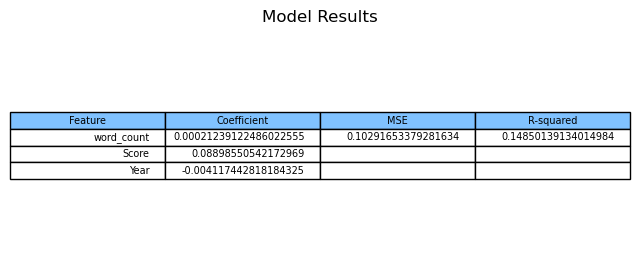

In [187]:
# Visualization : All Results Table 
final_results = coefficients.copy()
final_results['MSE'] = [mse] + [''] * (len(final_results) - 1) 
final_results['R-squared'] = [r2] + [''] * (len(final_results) - 1)

print(final_results)

fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')
table = plt.table(cellText=final_results.values, colLabels=final_results.columns, colColours=["#80C2FF"]*len(final_results.columns), loc='center')
table.auto_set_font_size(False)
table.set_fontsize(7)
plt.title("Model Results")
plt.show()

In [188]:
#Conclusion based on above results :
#Low R² indicates that helpfulness ratio is influenced by factors not included in the model, 
#such as semantic content of reviews, product category, or user behavior.

In [189]:
# Relevant columns for final DataFrame
final_df = df_clear[[
    'Id', 'ProductId', 'UserId', 'Score', 'Year', 'Month', 'HelpfulnessNumerator', 
    'HelpfulnessDenominator', 'HelpfulnessRatio', 'word_count', 'review_length'
]]

# checking for NaN values and their removing
final_df = final_df.dropna()

# Removing duplicates
final_df = final_df.drop_duplicates()

# Reset index
final_df = final_df.reset_index(drop=True)

final_df.head()

,Id,ProductId,UserId,Score,Year,Month,HelpfulnessNumerator,HelpfulnessDenominator,HelpfulnessRatio,word_count,review_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,5,2011,4,1,1,1.0,48,263
1,3,B000LQOCH0,ABXLMWJIXXAIN,4,2008,8,1,1,1.0,94,509
2,4,B000UA0QIQ,A395BORC6FGVXV,2,2011,6,3,3,1.0,41,219
3,9,B000E7L2R4,A1MZYO9TZK0BBI,5,2011,11,1,1,1.0,26,131
4,11,B0001PB9FE,A3HDKO7OW0QNK4,5,2005,2,1,1,1.0,146,779


In [190]:
# Saving DataFrame in new CSV file

final_path = 'processed_dataset.csv'
final_df.to_csv(final_path, index=False)
print(f"Final dataset saved to {final_path}")

Final dataset saved to processed_dataset.csv


In [191]:
# Setting random seed
np.random.seed(42)
random.seed(42)

In [192]:
#Final functions for new and cleaned CSV file :  

def set_random_seed(seed=42):
    np.random.seed(seed)
    random.seed(seed)
    print(f"Random seed set to {seed}")

def create_final_dataframe(df):
    final = df[[
        'Id', 'ProductId', 'UserId', 'Score', 'Year', 'Month', 
        'HelpfulnessNumerator', 'HelpfulnessDenominator', 'HelpfulnessRatio', 
        'word_count', 'review_length'
    ]]
    final = final.dropna().drop_duplicates().reset_index(drop=True)
    print(f"Final DataFrame created with {final.shape[0]} rows and {final.shape[1]} columns.")
    return final

def save_to_csv(df, file_name='processed_dataset.csv'):
    df.to_csv(file_name, index=False)
    print(f"Final dataset saved to {file_name}")

def main():
    set_random_seed(42)

    final_df = create_final_dataframe(df_clear)

    save_to_csv(final_df)

if __name__ == "__main__":
    main()

Random seed set to 42
Final DataFrame created with 298400 rows and 11 columns.
Final dataset saved to processed_dataset.csv
